

# Integrantes:
- Cristian Gomez
- Carlos Salcedo Ardila
- Mileidy Cruz
- Juan Diego Florez


In [42]:
!pip install sodapy

In [57]:
#Punto 1
#Cargue el dataset disponible en
#https://www.datos.gov.co/Transporte/Accidentes-de-Transito-ocurridos-en-el-Municipio-d/7cci-nqqb/about_data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sodapy import Socrata
import seaborn as sns
cliente=Socrata('www.datos.gov.co', None)
result=cliente.get("7cci-nqqb", limit=1000000)
df=pd.DataFrame.from_records(result)
print(df.head())
print(df.tail())

  orden       fecha   a_o        mes          d_a     gravedad peaton  \
0     1  01/01/2012  2012  01. Enero  07. Domingo  Con heridos      0   
1     2  01/01/2012  2012  01. Enero  07. Domingo   Solo daños      0   
2     3  01/01/2012  2012  01. Enero  07. Domingo   Solo daños      0   
3     4  01/01/2012  2012  01. Enero  07. Domingo   Solo daños      0   
4     5  01/01/2012  2012  01. Enero  07. Domingo  Con heridos      1   

  automovil campero camioneta  ... volqueta moto bicicleta otro  \
0         1       0         0  ...        0    0         0    0   
1         1       0         1  ...        0    0         0    0   
2         0       0         1  ...        0    0         0    0   
3         1       0         1  ...        0    0         0    0   
4         0       0         0  ...        0    1         0    0   

               barrio      hora      entidad            nombrecomuna  \
0               Mutis  12:15:00  AGENTES DTB               17. MUTIS   
1     Regadero

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39193 entries, 0 to 39192
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   orden                    39193 non-null  object
 1   fecha                    39193 non-null  object
 2   a_o                      39193 non-null  object
 3   mes                      39193 non-null  object
 4   d_a                      39193 non-null  object
 5   gravedad                 39193 non-null  object
 6   peaton                   39193 non-null  object
 7   automovil                39193 non-null  object
 8   campero                  39193 non-null  object
 9   camioneta                39193 non-null  object
 10  micro                    39193 non-null  object
 11  buseta                   39193 non-null  object
 12  bus                      39193 non-null  object
 13  camion                   39193 non-null  object
 14  volqueta                 39193 non-nul

In [59]:
df.describe()

,orden,fecha,a_o,mes,d_a,gravedad,peaton,automovil,campero,camioneta,...,volqueta,moto,bicicleta,otro,barrio,hora,entidad,nombrecomuna,propietario_de_veh_culo,diurnio_nocturno
count,39193,39193,39193,39193,39193,39193,39193,39193,39193,39193,...,39193,39193,39193,39193,39193,39193,39193,39193,39193,39193
unique,39193,4264,12,12,7,4,8,10,3,4,...,3,9,4,3,186,1141,2,21,2,2
top,1,11/05/2013,2012,03. Marzo,06. Sabado,Solo daños,0,1,0,0,...,0,0,0,0,Centro,16:00:00,AGENTES DTB,12. CABECERA DEL LLANO,Particular,Diurno
freq,1,26,4342,3473,6462,19602,35380,18248,36890,32007,...,38650,18268,38507,38391,3861,576,36658,6415,27981,27567


In [60]:
#se revisan que los datos de peaton a otro no tengan nulos revisando los unicos
for col in df.loc[:, 'peaton':'otro']:
    print(f"Valores únicos en la columna '{col}':")
    print(df[col].unique())
    print("-" * 50)

Valores únicos en la columna 'peaton':
['0' '1' '2' '3' '4' '6' '5' '7']
--------------------------------------------------
Valores únicos en la columna 'automovil':
['1' '0' '2' '3' '4' '17' '5' '10' '13' '29']
--------------------------------------------------
Valores únicos en la columna 'campero':
['0' '1' '2']
--------------------------------------------------
Valores únicos en la columna 'camioneta':
['0' '1' '2' '3']
--------------------------------------------------
Valores únicos en la columna 'micro':
['0' '1' '2']
--------------------------------------------------
Valores únicos en la columna 'buseta':
['0' '1' '2']
--------------------------------------------------
Valores únicos en la columna 'bus':
['0' '1' '2']
--------------------------------------------------
Valores únicos en la columna 'camion':
['0' '1' '2' '3']
--------------------------------------------------
Valores únicos en la columna 'volqueta':
['0' '1' '2']
--------------------------------------------------

In [61]:
# se convierten a int las columnas desde peaton hasta otro
for col in df.loc[:, 'peaton':'otro']:
    df[col] = pd.to_numeric(df[col], errors='coerce').astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39193 entries, 0 to 39192
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   orden                    39193 non-null  object
 1   fecha                    39193 non-null  object
 2   a_o                      39193 non-null  object
 3   mes                      39193 non-null  object
 4   d_a                      39193 non-null  object
 5   gravedad                 39193 non-null  object
 6   peaton                   39193 non-null  int64 
 7   automovil                39193 non-null  int64 
 8   campero                  39193 non-null  int64 
 9   camioneta                39193 non-null  int64 
 10  micro                    39193 non-null  int64 
 11  buseta                   39193 non-null  int64 
 12  bus                      39193 non-null  int64 
 13  camion                   39193 non-null  int64 
 14  volqueta                 39193 non-nul

In [62]:
#se convierte la columna fecha a formato datetime
df['fecha'] = pd.to_datetime(df['fecha'], format='%d/%m/%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39193 entries, 0 to 39192
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   orden                    39193 non-null  object        
 1   fecha                    39193 non-null  datetime64[ns]
 2   a_o                      39193 non-null  object        
 3   mes                      39193 non-null  object        
 4   d_a                      39193 non-null  object        
 5   gravedad                 39193 non-null  object        
 6   peaton                   39193 non-null  int64         
 7   automovil                39193 non-null  int64         
 8   campero                  39193 non-null  int64         
 9   camioneta                39193 non-null  int64         
 10  micro                    39193 non-null  int64         
 11  buseta                   39193 non-null  int64         
 12  bus                      39193 n

In [63]:
#se borra las columnas redundantes año, mes con la columna fecha

df = df.drop(columns=['a_o', 'mes'])

In [64]:
df.head()

,orden,fecha,d_a,gravedad,peaton,automovil,campero,camioneta,micro,buseta,...,volqueta,moto,bicicleta,otro,barrio,hora,entidad,nombrecomuna,propietario_de_veh_culo,diurnio_nocturno
0,1,2012-01-01,07. Domingo,Con heridos,0,1,0,0,0,0,...,0,0,0,0,Mutis,12:15:00,AGENTES DTB,17. MUTIS,Particular,Diurno
1,2,2012-01-01,07. Domingo,Solo daños,0,1,0,1,0,0,...,0,0,0,0,Regaderos Norte,14:00:00,AGENTES DTB,02. NORORIENTAL,Empresa,Diurno
2,3,2012-01-01,07. Domingo,Solo daños,0,0,0,1,0,0,...,0,0,0,0,Cabecera Del Llano,12:00:00,AGENTES DTB,12. CABECERA DEL LLANO,Particular,Diurno
3,4,2012-01-01,07. Domingo,Solo daños,0,1,0,1,0,0,...,0,0,0,0,Norte Bajo,18:30:00,AGENTES DTB,03. SAN FRANCISCO,Empresa,Nocturno
4,5,2012-01-01,07. Domingo,Con heridos,1,0,0,0,0,0,...,0,1,0,0,Dangond,00:30:00,AGENTES DTB,11. SUR,Particular,Nocturno


In [65]:
print(df["d_a"].unique()[6][:2])
print(df["d_a"].unique()[6][4:])
#df["diaN"]=[i[:2] for i in df["d_a"]]
df["diaS"]=[i[4:] for i in df["d_a"]]
df = df.drop(columns=['d_a'])

06
Sabado


In [66]:
df.head()

,orden,fecha,gravedad,peaton,automovil,campero,camioneta,micro,buseta,bus,...,moto,bicicleta,otro,barrio,hora,entidad,nombrecomuna,propietario_de_veh_culo,diurnio_nocturno,diaS
0,1,2012-01-01,Con heridos,0,1,0,0,0,0,0,...,0,0,0,Mutis,12:15:00,AGENTES DTB,17. MUTIS,Particular,Diurno,Domingo
1,2,2012-01-01,Solo daños,0,1,0,1,0,0,0,...,0,0,0,Regaderos Norte,14:00:00,AGENTES DTB,02. NORORIENTAL,Empresa,Diurno,Domingo
2,3,2012-01-01,Solo daños,0,0,0,1,0,0,0,...,0,0,0,Cabecera Del Llano,12:00:00,AGENTES DTB,12. CABECERA DEL LLANO,Particular,Diurno,Domingo
3,4,2012-01-01,Solo daños,0,1,0,1,0,0,0,...,0,0,0,Norte Bajo,18:30:00,AGENTES DTB,03. SAN FRANCISCO,Empresa,Nocturno,Domingo
4,5,2012-01-01,Con heridos,1,0,0,0,0,0,0,...,1,0,0,Dangond,00:30:00,AGENTES DTB,11. SUR,Particular,Nocturno,Domingo


In [67]:
cols = list(df.columns) #lista las columnas y las convierte a lista
cols.insert(2, cols.pop(-1)) #se mueve la columna diaS a la posicion 2
df = df[cols] #remplaza el df con ese nuevo orden
df.head()

,orden,fecha,diaS,gravedad,peaton,automovil,campero,camioneta,micro,buseta,...,volqueta,moto,bicicleta,otro,barrio,hora,entidad,nombrecomuna,propietario_de_veh_culo,diurnio_nocturno
0,1,2012-01-01,Domingo,Con heridos,0,1,0,0,0,0,...,0,0,0,0,Mutis,12:15:00,AGENTES DTB,17. MUTIS,Particular,Diurno
1,2,2012-01-01,Domingo,Solo daños,0,1,0,1,0,0,...,0,0,0,0,Regaderos Norte,14:00:00,AGENTES DTB,02. NORORIENTAL,Empresa,Diurno
2,3,2012-01-01,Domingo,Solo daños,0,0,0,1,0,0,...,0,0,0,0,Cabecera Del Llano,12:00:00,AGENTES DTB,12. CABECERA DEL LLANO,Particular,Diurno
3,4,2012-01-01,Domingo,Solo daños,0,1,0,1,0,0,...,0,0,0,0,Norte Bajo,18:30:00,AGENTES DTB,03. SAN FRANCISCO,Empresa,Nocturno
4,5,2012-01-01,Domingo,Con heridos,1,0,0,0,0,0,...,0,1,0,0,Dangond,00:30:00,AGENTES DTB,11. SUR,Particular,Nocturno


In [68]:
df.describe()

,fecha,peaton,automovil,campero,camioneta,micro,buseta,bus,camion,volqueta,moto,bicicleta,otro
count,39193,39193.000000,39193.000000,39193.000000,39193.000000,39193.000000,39193.000000,39193.000000,39193.000000,39193.000000,39193.000000,39193.000000,39193.000000
mean,2017-02-13 20:32:53.372796416,0.105529,0.781262,0.060368,0.197076,0.020284,0.043732,0.048070,0.083331,0.014033,0.626617,0.017682,0.021279
min,2012-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2014-05-17 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2016-12-27 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,2019-07-22 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,2023-09-30 00:00:00,7.000000,29.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,8.000000,3.000000,2.000000
std,NaN,0.340785,0.742035,0.244827,0.431634,0.142054,0.210890,0.217934,0.287960,0.119138,0.654329,0.133333,0.149867


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39193 entries, 0 to 39192
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   orden                    39193 non-null  object        
 1   fecha                    39193 non-null  datetime64[ns]
 2   diaS                     39193 non-null  object        
 3   gravedad                 39193 non-null  object        
 4   peaton                   39193 non-null  int64         
 5   automovil                39193 non-null  int64         
 6   campero                  39193 non-null  int64         
 7   camioneta                39193 non-null  int64         
 8   micro                    39193 non-null  int64         
 9   buseta                   39193 non-null  int64         
 10  bus                      39193 non-null  int64         
 11  camion                   39193 non-null  int64         
 12  volqueta                 39193 n

In [70]:
"""
coeficiente de variación (CV): El coeficiente de variación es una medida de la dispersión relativa de una variable.
Se calcula como la razón del desvío estándar (σ) sobre la media (μ) de la variable,
y se expresa como un porcentaje.
"""
df.dropna(inplace=True)
def CV_df(df):
    df_numerico = df.select_dtypes(include='number')
    CV = {columna : (df_numerico[columna].std() * 100) / df_numerico[columna].mean() for columna in df_numerico.columns}
    CV = pd.DataFrame([CV], columns=df_numerico.columns)
    return CV
CV_df(df)

,peaton,automovil,campero,camioneta,micro,buseta,bus,camion,volqueta,moto,bicicleta,otro
0,322.929751,94.979067,405.557307,219.019129,700.319669,482.228648,453.370237,345.560921,848.974263,104.422472,754.074017,704.283501


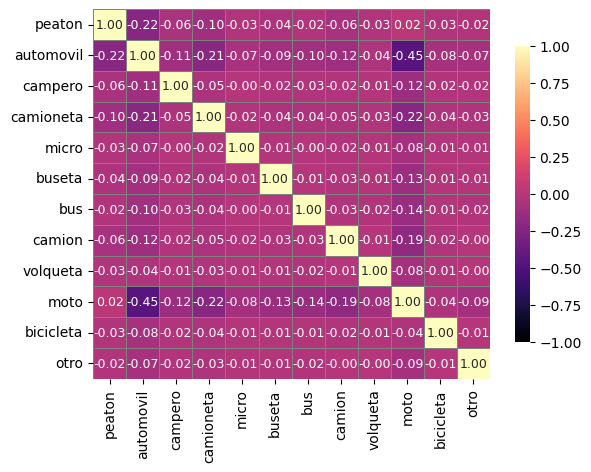

In [71]:
correlacion = df.select_dtypes(include="number").corr()
sns.heatmap(data= correlacion,
            vmin = -1,
            vmax = 1,
            center = 0,
            annot = True,
            fmt=".2f",  # Formato de los números de correlación
            cmap="magma",  # Paleta de colores personalizada
            linewidths=0.5,  # Ancho de las líneas entre celdas
            linecolor='gray',  # Color de las líneas entre celdas
            annot_kws={"size": 9},  # Tamaño de los números de correlación
            cbar_kws={"shrink": 0.8})

#plt.savefig("correlacion.png", format='png', bbox_inches='tight')
plt.show()

In [ ]:
list(df.columns)

['orden',
 'fecha',
 'diaS',
 'gravedad',
 'peaton',
 'automovil',
 'campero',
 'camioneta',
 'micro',
 'buseta',
 'bus',
 'camion',
 'volqueta',
 'moto',
 'bicicleta',
 'otro',
 'barrio',
 'hora',
 'entidad',
 'nombrecomuna',
 'propietario_de_veh_culo',
 'diurnio_nocturno']

In [ ]:
#se revisan que los datos de peaton a otro no tengan nulos revisando los unicos
for col in ["gravedad"]:
    print(f"Valores únicos en la columna '{col}':")
    print(df[col].unique())
    print("-" * 50)

Valores únicos en la columna 'gravedad':
['Con heridos' 'Solo daños' 'Con muertos' 'Con Muertos']
--------------------------------------------------


In [ ]:
df.loc[df["gravedad"]=="Con Muertos","gravedad"]="Con muertos"
df["gravedad"].unique()

array(['Con heridos', 'Solo daños', 'Con muertos'], dtype=object)

In [ ]:
# Orden se vuelve indice
df.set_index("orden",inplace=True)

In [ ]:
#sub conjunto de valores int para conseguir accidentes totales
df_vehiculo = df.iloc[:,3:15]
df_vehiculo = df_vehiculo.apply(pd.to_numeric, errors='coerce') #asegurar que los numeros sean Int, el metodo apply
df_vehiculo["Total_accidentes"]=df_vehiculo.sum(axis=1) #suma de accidentes por dia
total_columnas = df_vehiculo.sum(axis=0)
print(total_columnas)

peaton               4136
automovil           30620
campero              2366
camioneta            7724
micro                 795
buseta               1714
bus                  1884
camion               3266
volqueta              550
moto                24559
bicicleta             693
otro                  834
Total_accidentes    79141
dtype: int64


In [ ]:
df["Total_accidentes"]=df_vehiculo["Total_accidentes"] #Creacion de una nueva columna
columnas_eliminar= list(df.columns[3:15]) #lista de columnas a eliminar
df_ordenado = df.drop(columns=columnas_eliminar) #Df nuevo con la informacion necesaria
df_ordenado.columns

Index(['fecha', 'diaS', 'gravedad', 'barrio', 'hora', 'entidad',
       'nombrecomuna', 'propietario_de_veh_culo', 'diurnio_nocturno',
       'Total_accidentes'],
      dtype='object')

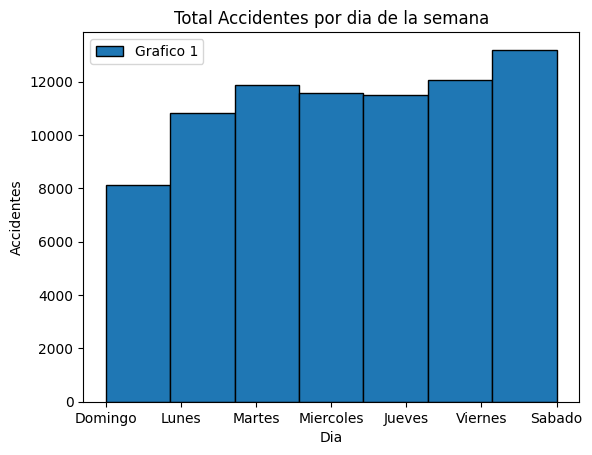

In [ ]:
plt.hist(df_ordenado["diaS"],weights=df_ordenado["Total_accidentes"],bins=7, edgecolor="black", label="Grafico 1") # Histograma
plt.xlabel("Dia")
plt.ylabel("Accidentes")
plt.title("Total Accidentes por dia de la semana")
plt.legend()
plt.show()

In [ ]:
#Limpieza de datos Comuna
df_ordenado[['n_Comuna', 'Comuna']] = df['nombrecomuna'].str.split('.', expand=True) #separar por .
df_ordenado = df_ordenado.drop(columns=['n_Comuna',"nombrecomuna"])
df_ordenado.head()

,fecha,diaS,gravedad,barrio,hora,entidad,propietario_de_veh_culo,diurnio_nocturno,Total_accidentes,Comuna
orden,,,,,,,,,,
1,2012-01-01,Domingo,Con heridos,Mutis,12:15:00,AGENTES DTB,Particular,Diurno,1,MUTIS
2,2012-01-01,Domingo,Solo daños,Regaderos Norte,14:00:00,AGENTES DTB,Empresa,Diurno,2,NORORIENTAL
3,2012-01-01,Domingo,Solo daños,Cabecera Del Llano,12:00:00,AGENTES DTB,Particular,Diurno,1,CABECERA DEL LLANO
4,2012-01-01,Domingo,Solo daños,Norte Bajo,18:30:00,AGENTES DTB,Empresa,Nocturno,2,SAN FRANCISCO
5,2012-01-01,Domingo,Con heridos,Dangond,00:30:00,AGENTES DTB,Particular,Nocturno,2,SUR


In [ ]:
cols = list(df_ordenado.columns) #lista las columnas y las convierte a lista
cols.insert(4, cols.pop(-1)) #se mueve la columna Comuna a la posicion 4
df_ordenado = df_ordenado[cols] #remplaza el df con ese nuevo orden
df_ordenado.head()

,fecha,diaS,gravedad,barrio,Comuna,hora,entidad,propietario_de_veh_culo,diurnio_nocturno,Total_accidentes
orden,,,,,,,,,,
1,2012-01-01,Domingo,Con heridos,Mutis,MUTIS,12:15:00,AGENTES DTB,Particular,Diurno,1
2,2012-01-01,Domingo,Solo daños,Regaderos Norte,NORORIENTAL,14:00:00,AGENTES DTB,Empresa,Diurno,2
3,2012-01-01,Domingo,Solo daños,Cabecera Del Llano,CABECERA DEL LLANO,12:00:00,AGENTES DTB,Particular,Diurno,1
4,2012-01-01,Domingo,Solo daños,Norte Bajo,SAN FRANCISCO,18:30:00,AGENTES DTB,Empresa,Nocturno,2
5,2012-01-01,Domingo,Con heridos,Dangond,SUR,00:30:00,AGENTES DTB,Particular,Nocturno,2


In [ ]:
#Agrupacion por barrio y por comuna
df_ordenado["barrio"].unique()
df['barrio'] = df['barrio'].str.strip()

In [ ]:
df_barrio = df_ordenado.groupby('barrio')['Total_accidentes'].sum()
df_comuna = df_ordenado.groupby('Comuna')['Total_accidentes'].sum()

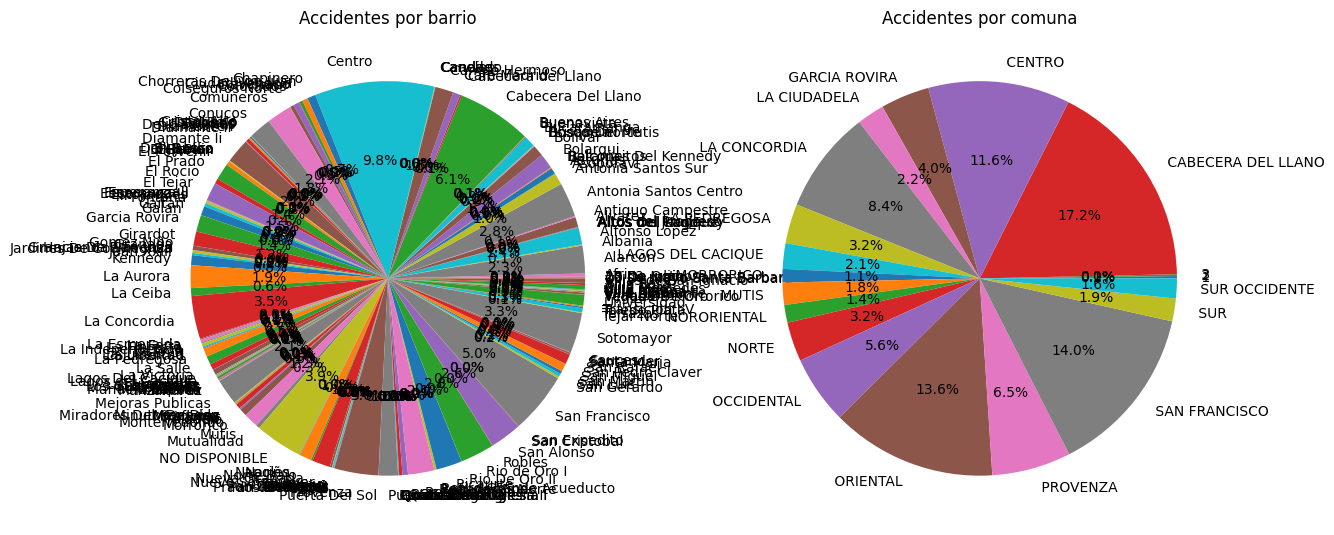

In [ ]:
fig, axes= plt.subplots(1, 2, figsize=(14, 7)) #2 Diagramas
plt.subplot(1,2,1) #primer grafico
plt.pie(df_barrio,labels=df_barrio.index, autopct='%1.1f%%')
plt.title("Accidentes por barrio")
plt.subplot(1,2,2) #segundo grafico
plt.pie(df_comuna,labels=df_comuna.index, autopct='%1.1f%%')
plt.title("Accidentes por comuna")
plt.show()

In [ ]:
df.columns

Index(['fecha', 'diaS', 'gravedad', 'peaton', 'automovil', 'campero',
       'camioneta', 'micro', 'buseta', 'bus', 'camion', 'volqueta', 'moto',
       'bicicleta', 'otro', 'barrio', 'hora', 'entidad', 'nombrecomuna',
       'propietario_de_veh_culo', 'diurnio_nocturno', 'Total_accidentes'],
      dtype='object')

In [ ]:
df_año= df.copy() #Copia del DataFrame Original
df_año["año"]=df_año["fecha"].dt.year #Creacion de columna año
df_año.drop(columns="fecha",inplace=True) #Eliminacion de columna fecha
cols = list(df_año.columns) #ordenamiento de columnas
cols.insert(0, cols.pop(-1))
df_año = df_año[cols]
df_año.head()

,año,diaS,gravedad,peaton,automovil,campero,camioneta,micro,buseta,bus,...,moto,bicicleta,otro,barrio,hora,entidad,nombrecomuna,propietario_de_veh_culo,diurnio_nocturno,Total_accidentes
orden,,,,,,,,,,,,,,,,,,,,,
1,2012,Domingo,Con heridos,0,1,0,0,0,0,0,...,0,0,0,Mutis,12:15:00,AGENTES DTB,17. MUTIS,Particular,Diurno,1
2,2012,Domingo,Solo daños,0,1,0,1,0,0,0,...,0,0,0,Regaderos Norte,14:00:00,AGENTES DTB,02. NORORIENTAL,Empresa,Diurno,2
3,2012,Domingo,Solo daños,0,0,0,1,0,0,0,...,0,0,0,Cabecera Del Llano,12:00:00,AGENTES DTB,12. CABECERA DEL LLANO,Particular,Diurno,1
4,2012,Domingo,Solo daños,0,1,0,1,0,0,0,...,0,0,0,Norte Bajo,18:30:00,AGENTES DTB,03. SAN FRANCISCO,Empresa,Nocturno,2
5,2012,Domingo,Con heridos,1,0,0,0,0,0,0,...,1,0,0,Dangond,00:30:00,AGENTES DTB,11. SUR,Particular,Nocturno,2


In [ ]:
vehiculos= list(df_año.columns[3:15]) #lista de vehiculos
df_año_vehiculos = df_año.groupby("año")[vehiculos].sum() #agrupacion por año y tipo de vehiculo
df_año_vehiculos.head()

,peaton,automovil,campero,camioneta,micro,buseta,bus,camion,volqueta,moto,bicicleta,otro
año,,,,,,,,,,,,
2012,396,3835,305,720,113,235,172,394,101,2249,49,104
2013,376,3470,287,746,88,187,199,401,99,2131,45,91
2014,408,3057,280,694,98,158,222,330,69,2147,47,82
2015,380,2947,254,800,78,155,203,327,67,2305,39,77
2016,415,2863,263,750,73,176,194,333,62,2329,60,54


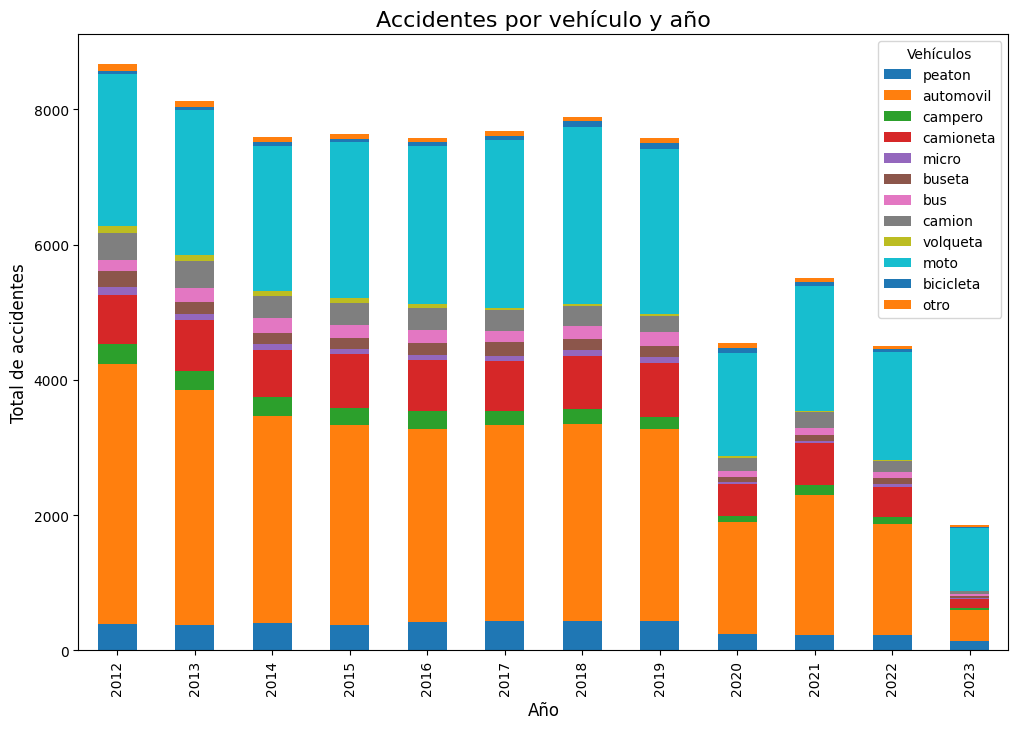

In [ ]:
df_año_vehiculos.plot(kind="bar",stacked=True,figsize=(12, 8))
plt.title("Accidentes por vehículo y año", fontsize=16)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Total de accidentes", fontsize=12)
plt.legend(title="Vehículos")
plt.show()

In [ ]:
df_ordenado["entidad"].unique()

array(['AGENTES DTB', 'AGENTES POLICIA NACIONAL'], dtype=object)

Text(0, 0.5, 'Total de accidentes')

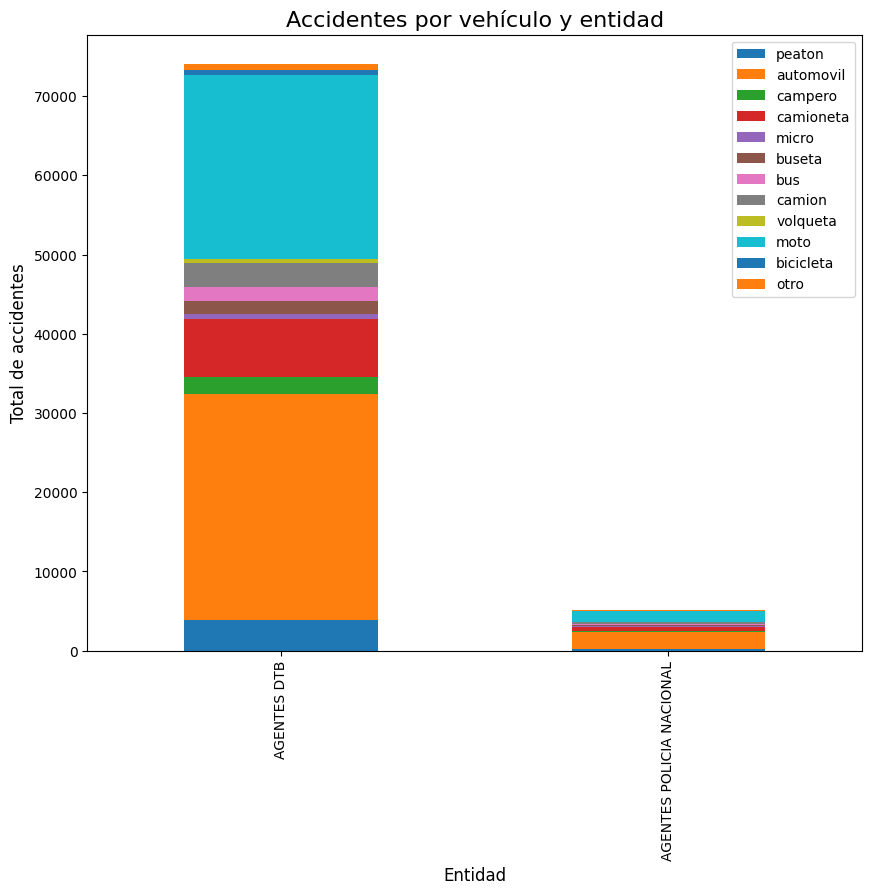

In [ ]:
df_entidad = df_año.groupby("entidad")[vehiculos].sum()
df_entidad.plot(kind="bar",stacked=True,figsize=(10, 8))
plt.title("Accidentes por vehículo y entidad", fontsize=16)
plt.xlabel("Entidad", fontsize=12)
plt.ylabel("Total de accidentes", fontsize=12)

In [ ]:
df_ordenado.columns

Index(['fecha', 'diaS', 'gravedad', 'barrio', 'Comuna', 'hora', 'entidad',
       'propietario_de_veh_culo', 'diurnio_nocturno', 'Total_accidentes'],
      dtype='object')

Text(0, 0.5, 'Total de accidentes')

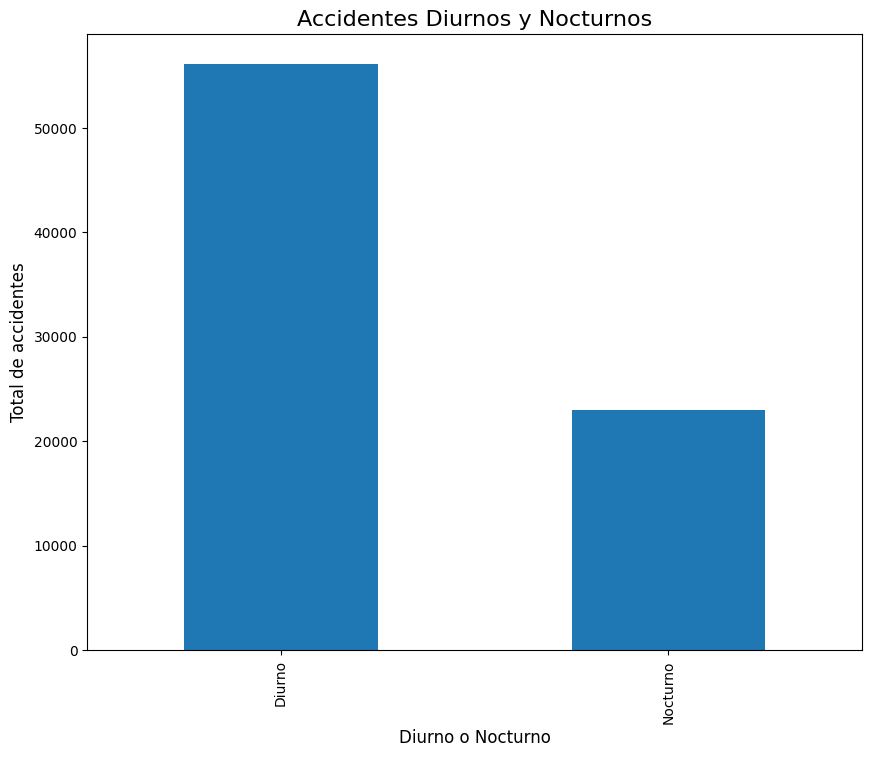

In [ ]:
df_diurnoc=df_ordenado.groupby("diurnio_nocturno")["Total_accidentes"].sum()
df_diurnoc.plot(kind="bar",stacked=True,figsize=(10, 8))
plt.title("Accidentes Diurnos y Nocturnos", fontsize=16)
plt.xlabel("Diurno o Nocturno", fontsize=12)
plt.ylabel("Total de accidentes", fontsize=12)

Text(0, 0.5, 'Total de accidentes')

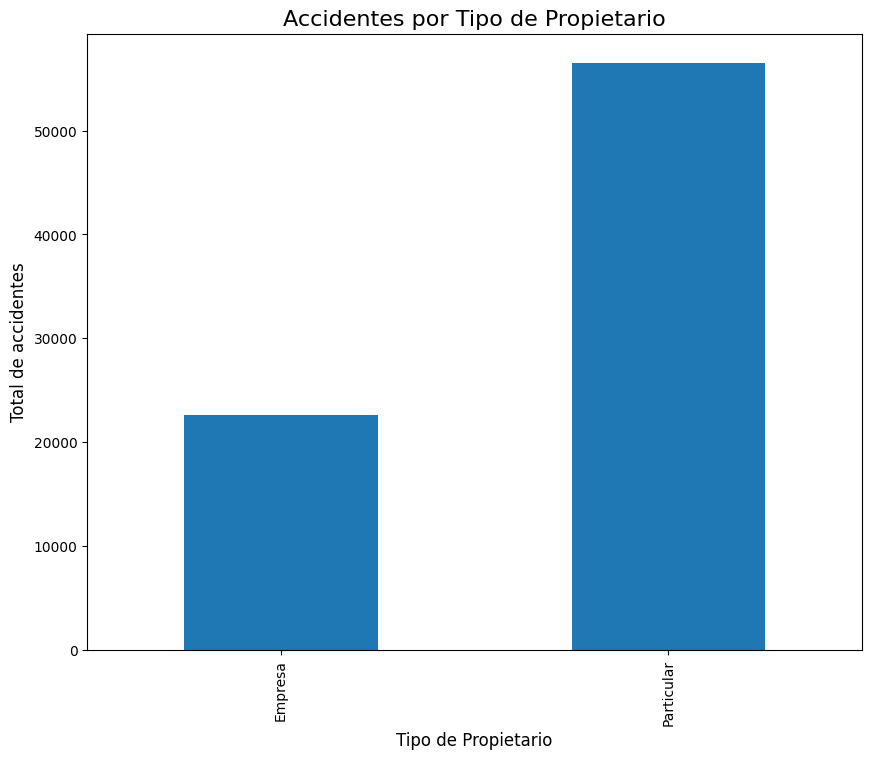

In [ ]:
df_propietario=df_ordenado.groupby("propietario_de_veh_culo")["Total_accidentes"].sum()
df_propietario.plot(kind="bar",figsize=(10, 8))
plt.title("Accidentes por Tipo de Propietario", fontsize=16)
plt.xlabel("Tipo de Propietario", fontsize=12)
plt.ylabel("Total de accidentes", fontsize=12)